<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Import the required libraries


In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
data = pd.read_csv('Battery_RUL.csv')
data.head()


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


# 1. About the Data


In [3]:
#Brief Description Of My Data:
#  Topic of this dataset is battery remaining useful life. Our dataset has 9 features and 15065 example of the batteries.
#  All 9 featureas are numerical. So we do not have to do encoding for this dataset. Our target variable is "RUL". 
#  Features of this columns can be listed an be explained as :
#
#    Cycle Index: This column represents the number of cycles that have passed until a particular point in time. A cycle typically refers to the complete charge and discharge of a battery.
#    Discharge Time (s) : This column indicates the duration, in seconds, of the discharge phase of the battery. It measures the time taken for the battery to discharge its stored energy.
#    Time at 4.15V (s) :This column represents the duration, in seconds, during which the battery voltage remains at 4.15 volts. It can provide insights into the stability of the battery's voltage during operation
#    Time Constant Current (s) :  This column measures the time, in seconds, during which the battery is subjected to a constant current. It indicates the duration for which the battery sustains a consistent flow of electric current.
#    Decrement 3.6-3.4V (s) : This column denotes the duration, in seconds, over which the battery voltage decreases from 3.6 volts to 3.4 volts during discharge. It reflects the rate of voltage decline during a specific voltage range.
#    Max. Voltage Discharge (V) :  This column represents the maximum voltage achieved by the battery during the discharge phase, measured in volts. It indicates the peak voltage output during battery operation.
#    Min. Voltage Charge (V) : This column indicates the minimum voltage observed during the charging phase of the battery, measured in volts. It reflects the lowest voltage level attained during the recharging process.
#    Charging Time (s) : This column specifies the duration, in seconds, taken for the battery to undergo the charging process. It measures the time required to replenish the battery's energy stores.
#    Total time (s) : This column represents the total time, in seconds, elapsed for a particular battery cycle, encompassing both discharge and charging phases.
#    RUL:  This is the target variable of interest in oour analysis. It indicates the remaining lifespan of the battery at a specific point in time. The objective is to predict this variable based on the other features provided in the dataset.
     


In [4]:
data.info()
print(data.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB
['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


In [5]:
# As you can see, variables that are related to time given as seconds.
# As you can see, variables that are related to electricity given as Voltage.

In [6]:
for column in data.columns:
    column_average = data[column].mean()
    print(f"Average of {column}: {column_average}")

Average of Cycle_Index: 556.1550053106745
Average of Discharge Time (s): 4581.273960435476
Average of Decrement 3.6-3.4V (s): 1239.784671749706
Average of Max. Voltage Dischar. (V): 3.9081763807753584
Average of Min. Voltage Charg. (V): 3.5779039431757833
Average of Time at 4.15V (s): 3768.336170946925
Average of Time constant current (s): 5461.266969596389
Average of Charging time (s): 10066.496204195433
Average of RUL: 554.1941715347849


# 2. Objectives


In [7]:
#Main Objective:
    # Our objective is creating a predictive model to find remaining battery useful life. We will try to achive this objective with a Linear Regression model. 
    # For finding the best linear regression model, we will develop several models with different perspectives.
    # For example, we will try, simple linear regression model, regression models with Ridge, Lasso, Elastic Net regularizations, polynomail features(with degree 2, with degree 3)
    # and the combination of polynomail features with regularizations.


In [8]:
X = data.drop(columns=['RUL'], axis=1)  # Dropping 'RUL' columns as because that is our target variable.
Y = data['RUL']

In [9]:
#  Brief summary of data exploration and actions taken for data cleaning and feature engineering:


# Feature Engineering:
#  As you can see, all the variables are float64 or int64 type. So there is no need for encoding for this dataset.
#  However the data need to be scaled because feature's range differs from one to another. For that reason, I applied standart scaler. 
#  Also, this dataset doesnt have 'NULL' rows in any of its columns. If it were, we would need to use imputation methods.

In [10]:
# Applying standart scaling to my data:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
scaler = StandardScaler()


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

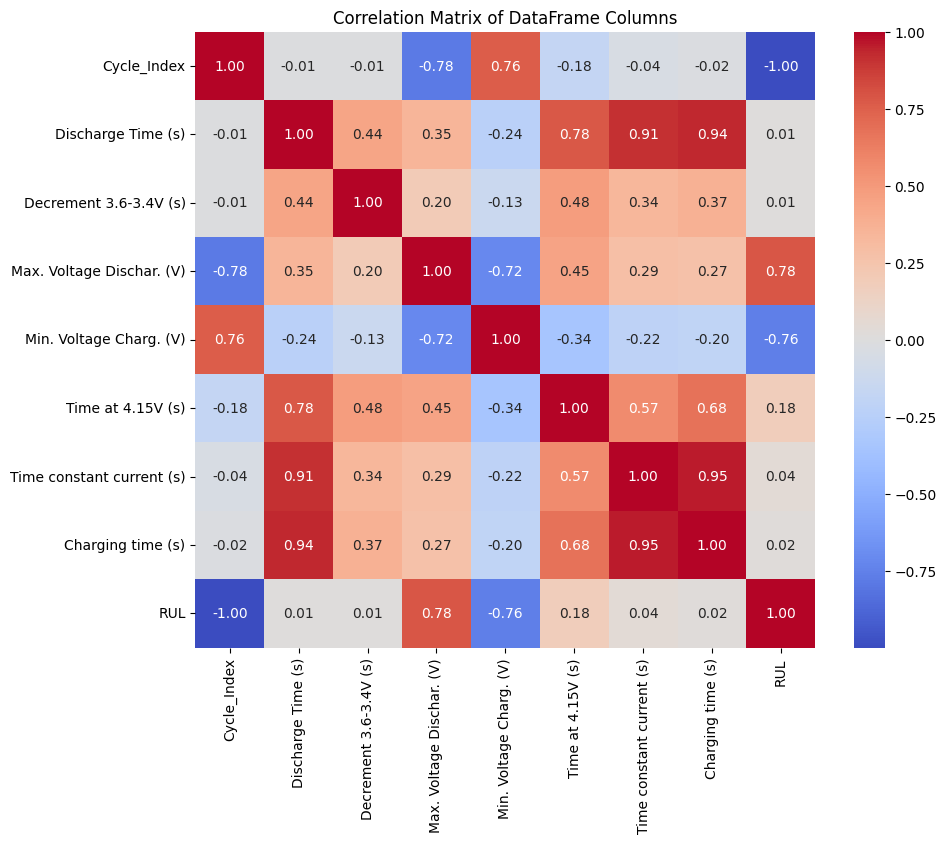

In [11]:
#As you can see , some features has very low correlation with target variable. That indicates even from know, Lasso regularization can be a good choice. 
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Correlation Matrix of DataFrame Columns') 
plt.show()

# 3. Linear Regression Models


In [12]:
# We will try:
#   1 simple linear regression model
#   3 linear regression model with regularization(1 for Ridge regression, 1 for Lasso regression, 1 for elastic net regression)
#   2 polynomial featured linear regression model(1 with degree 2 , 1 with degree 3)
#   1 linear regression model with polynomial regression(degree 3) + Elastic net regularization
#



In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

46.94479396630416


In [14]:
alpha = 0.10  
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)



46.94810712956858


In [15]:
lasso_model = Lasso(alpha=0.10)  
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (with Lasso regularization):", mse_lasso)

Mean Squared Error (with Lasso regularization): 46.86429687644773


In [16]:
elastic_net_model = ElasticNet(alpha=0.15, l1_ratio=0.5)  
elastic_net_model.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print("Mean Squared Error (with Elastic Net regularization):", mse_elastic_net)

Mean Squared Error (with Elastic Net regularization): 1263.5963077763229


In [17]:
lr_model = LinearRegression()
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X=X_train)
X_test_poly = poly_reg.transform(X_test)
lr_model.fit(x_poly,y_train)
y_pred = lr_model.predict(X_test_poly)
mse = mean_squared_error(y_test,y_pred)
print(mse)

118.80578142502183


In [18]:
lr_model = LinearRegression()
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(X=X_train)
X_test_poly = poly_reg.transform(X_test)
lr_model.fit(x_poly,y_train)
y_pred = lr_model.predict(X_test_poly)
mse = mean_squared_error(y_test,y_pred)
print(mse)

130426821.23995525


In [19]:
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio is the mixing parameter (0 for L2 penalty, 1 for L1 penalty)
elastic_net_model.fit(x_poly, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test_poly)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print("Mean Squared Error (with Elastic Net regularization):", mse_elastic_net)

Mean Squared Error (with Elastic Net regularization): 3798.8897854880197


c:\Users\Hamza\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.683e+07, tolerance: 1.257e+05
  model = cd_fast.enet_coordinate_descent(


In [20]:
 # Important Note : Our target variable average is 554.1941715347849 and it doesnt have high standart deviation. For example if you look at the like first 50 example, our target variable is around 1000. Our mse is 
 # in the models are changing like 46... , 1263..., 118... . If you divide the error with average , you can see how much the predicted values differ from real results. 
 # To give an example (lasso regularized error)46.86429687644773 / 554.1941715347849(average of target variable)  indicates that model is very accurate.

In [21]:
# !!! FINAL RESULTS
# Regression model that I reccomend after trying  7 different model  in terms of accuracy and explainability:
# I am reccomening the lasso_linear regression model. Becase, if we compare, it has the lowest error amongs to other models.
# Also lasso_linear regression models is the best model for explainability. Beucase it does automatic feaute elimination. In this 
# dataset it eliminated 5 feature(you will see the correleation, dont worry) that has so little effect in the target variable.
# But we should also note that , model with ridge regularization is close error rate with this lasso_linear model. 




# 4. Insights and key findings


In [22]:
#This title can be divided into several sub title. So ı will divide it and explain them.
#Feature Importance:
 # As you can see from two cells in below, we can see the correlation between features and target variables.
 # I put the ridge model coeffictions for better understanding the lasso regularization effect.
 # As you can see in lasso regression, 'Cycle_Index' 'Min. Voltage Charg.' has negative correlation. That means increase in these columns cause  the target variables value decrease.add()
 # As you can see 'Max. Voltage Dischar. (V)' has positive correlation with target variable. That means increase in this variable cause the target varaible value incrase.

 # !!!Important note = The reason why the lasso model has 5 features that has correlation 0 is beacuse lasso model tends to do feature elimination if the feature is very litte effect in the target variable
 # But you can see in the ridge regression model, this features has litte effect in the target feature.



In [23]:
feature_importance = lasso_model.coef_
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
Cycle_Index: -322.76123790493426
Discharge Time (s): 0.0
Decrement 3.6-3.4V (s): -0.0
Max. Voltage Dischar. (V): 0.07407998336561566
Min. Voltage Charg. (V): -0.0500838754876209
Time at 4.15V (s): 0.0
Time constant current (s): 0.0
Charging time (s): -0.0


In [24]:
feature_importance = ridge_model.coef_
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
Cycle_Index: -322.64641925682355
Discharge Time (s): -0.42396189982726856
Decrement 3.6-3.4V (s): -0.07072662047723367
Max. Voltage Dischar. (V): 0.14565232346525264
Min. Voltage Charg. (V): -0.13611208472440398
Time at 4.15V (s): 0.3122176092685296
Time constant current (s): 0.6555502648750621
Charging time (s): -0.4577098944717276


In [25]:
#Model Performence:
 # The best model for this dataset is lasso regularized model. This is because , some features has so little effect and the lasso model is best choice if the dataset contains irrelevant features.
 # But we cant say the diffenece was huge with the ridge regression. They have very close error. 
 # We can see our dataset doesnt involve polynomial features. Because when we tried with degree 2 and degree 3 polynomial features, MSE is increased vastly.



In [26]:
#Regularization Effectiveness:
 # Regularization techniques, particularly Lasso and Ridge regression, demonstrated effectiveness in preventing overfitting and improving generalization performance.

# 5. Next Steps


In [27]:
#Moving forward, several avenues for further analysis and improvements can be explored:
#   Ensemble Techniques: Investigating ensemble methods such as Gradient Boosting or Random Forests could potentially 
#       improve predictive accuracy by leveraging the strengths of multiple models.


#   Hyperparameter Tuning: Fine-tuning the hyperparameters of selected models, particularly regularization strength
#       in Ridge and Lasso regression, can optimize model performance.


#   Exploring Additional Data Sources: Integrating additional datasets, such as environmental conditions or battery 
#       usage context, may provide supplementary information to enhance predictive capabilities.


In [28]:
# This is the end of my assignment. Thank you for evaluating my work.add()
# My Best Regards
# Hamza Emin Hacıoğlu

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
